# Decision tree exercise

In [145]:
# allows to import files from other directories
import sys
sys.path.append("/Users/migashane/CodeUp/Data_Science/classification-exercises/util_")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import prepare_
import explore

In [106]:
titanic = prepare.prep_titanic()

**make baseline**

In [107]:
# create base line
titanic["baseline"] =[int(titanic.survived.mode()) for i in range(len(titanic))]

titanic.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S,baseline
0,0,0,3,male,22.0,1,0,7.2500,S,0,1,0,1,0
1,1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,1,0,0,1,0


**split**

In [108]:
train, validate, test = prepare_.split_data_(df=titanic, stratify_col="survived", random_state=95)
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S,baseline
84,84,1,2,female,17.0,0,0,10.5000,S,1,0,0,1,0
138,138,0,3,male,16.0,0,0,9.2167,S,1,1,0,1,0
369,369,1,1,female,24.0,0,0,69.3000,C,1,0,0,0,0
577,577,1,1,female,39.0,1,0,55.9000,S,0,0,0,1,0
212,212,0,3,male,22.0,0,0,7.2500,S,1,1,0,1,0


1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [109]:
# baseline accurecy
baseline_acc_score = accuracy_score(train.survived, train.baseline)
baseline_acc_score

0.6161048689138576

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

**separet feature from target**

In [110]:
# train features and target
xtrain = train.drop(columns=["sex","age", "embarked", "passenger_id", "baseline", "survived"])
ytrain = train.survived

# validate features and target
xval = validate.drop(columns=["sex","age", "embarked", "passenger_id", "baseline", "survived"])
yval = validate.survived

# test features and target
xtest = test.drop(columns=["sex","age", "embarked", "passenger_id", "baseline", "survived"])
ytest = test.survived


**creat tree object**

In [111]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# gini is default

treeClf = DecisionTreeClassifier(max_depth= 2, random_state=95)
treeClf


DecisionTreeClassifier(max_depth=2, random_state=95)

**Fit model**

In [112]:
treeClf = treeClf.fit(xtrain, ytrain)
treeClf

DecisionTreeClassifier(max_depth=2, random_state=95)

**tree plot**

[Text(0.5, 0.8333333333333334, 'x[5] <= 0.5\ngini = 0.473\nsamples = 534\nvalue = [329, 205]'),
 Text(0.25, 0.5, 'x[0] <= 2.5\ngini = 0.371\nsamples = 191\nvalue = [47, 144]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.074\nsamples = 104\nvalue = [4, 100]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 87\nvalue = [43, 44]'),
 Text(0.75, 0.5, 'x[3] <= 15.173\ngini = 0.292\nsamples = 343\nvalue = [282, 61]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.192\nsamples = 204\nvalue = [182, 22]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.404\nsamples = 139\nvalue = [100, 39]')]

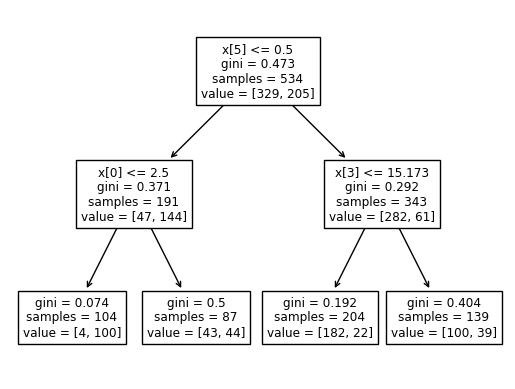

In [113]:
plot_tree(treeClf)

**make prediction**

In [114]:
ypred = treeClf.predict(xtrain)
ypred[:20]

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0])

In [115]:
# meaning of predictions
treeClf.classes_

# 1 == survived
# 0 == didn't make it

array([0, 1])

**Estimate probability**

In [116]:
treeClf.predict_proba(xtrain)

array([[0.03846154, 0.96153846],
       [0.89215686, 0.10784314],
       [0.03846154, 0.96153846],
       ...,
       [0.89215686, 0.10784314],
       [0.89215686, 0.10784314],
       [0.49425287, 0.50574713]])

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

|**actual**|**predicted**|**case**|
|----|----|----|
|True | Positive| number of occurrences where y is true and y is predicted true.|
|True | Negative| number of occurrences where y is false and y is predicted false.|
|False | Positive| number of occurrences where y is false and y is predicted true.|
|False | Negative| number of occurrences where y is true and y is predicted false.|

**Accurecy of model**

In [117]:
accurecy = treeClf.score(xtrain,ytrain)
print("Accurecy of decision tree on training:", accurecy)

Accurecy of decision tree on training: 0.797752808988764


**Confusion matrix**

In [118]:
confusion_matrix(ytrain,ypred)

array([[282,  47],
       [ 61, 144]])

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [119]:
print(classification_report(ytrain, ypred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       329
           1       0.75      0.70      0.73       205

    accuracy                           0.80       534
   macro avg       0.79      0.78      0.78       534
weighted avg       0.80      0.80      0.80       534



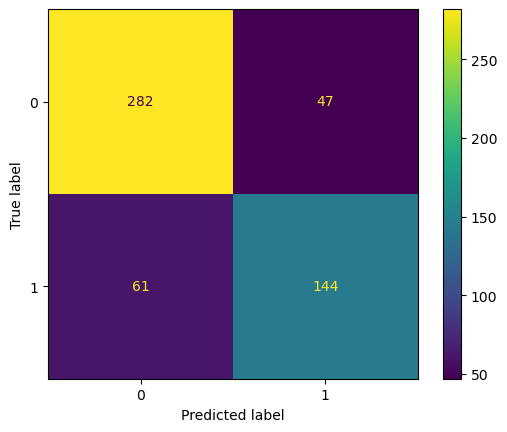

In [120]:
ConfusionMatrixDisplay.from_estimator(treeClf, xtrain, ytrain)

5. Run through steps 2-4 using a different max_depth value.

In [121]:
def decision_tree_flow(depth):
    # create tree object
    # for classification you can change the algorithm to gini or entropy (information gain).  
    # gini is default

    treeClf = DecisionTreeClassifier(max_depth= depth, random_state=95)
    
    # fit model
    treeClf = treeClf.fit(xtrain, ytrain)
    
    # plot tree
    treePlot = plot_tree(treeClf)
    
    #make predictions
    ypred = treeClf.predict(xtrain)
    
    # estimate probability
    ypred_proba = treeClf.predict_proba(xtrain)
    
    # confusion matrix
    confMtx = confusion_matrix(ytrain,ypred)
    
    # classification report
    clReport = classification_report(ytrain, ypred)
    print(clReport)
    
    # heat map
    visual = ConfusionMatrixDisplay.from_estimator(treeClf, xtrain, ytrain)
    
    return treePlot, ypred, ypred_proba, confMtx, clReport, visual


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       329
           1       0.80      0.72      0.76       205

    accuracy                           0.82       534
   macro avg       0.82      0.80      0.81       534
weighted avg       0.82      0.82      0.82       534



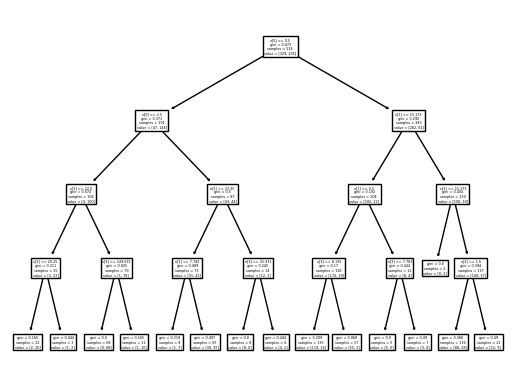

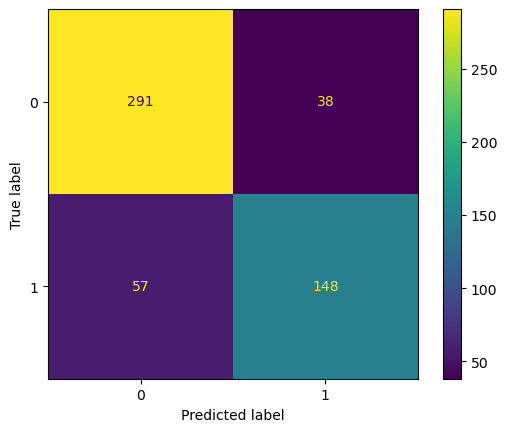

In [122]:
treePlot, ypred, ypred_proba, confMtx, clReport, visual = decision_tree_flow(depth = 4)

6. Which model performs better on your in-sample data?

In [139]:
results = []
for i in range(1,11):
#     base line
    baseline_acc_score = accuracy_score(train.survived, train.baseline)

#      create tree object
    # for classification you can change the algorithm to gini or entropy (information gain).  
    # gini is default

    treeClf = DecisionTreeClassifier(max_depth= i, random_state=95)
    
    # fit model
    treeClf = treeClf.fit(xtrain, ytrain)
    
    # train accurecy score
    trainScore = treeClf.score(xtrain, ytrain)
    validateScore = treeClf.score(xval, yval)
    
    clf_dic = {
        "depth": i,
        "train_score": trainScore,
        "validate_score": validateScore,
        "difference": trainScore - validateScore,
        "train_baseline_diff": baseline_acc_score - trainScore,
        "val_baseline_diff": baseline_acc_score - validateScore
    }
    
    results.append(clf_dic)
    

In [140]:
res_df = pd.DataFrame(results)
res_df.head()

,depth,train_score,validate_score,difference,train_baseline_diff,val_baseline_diff
0,1,0.797753,0.769663,0.028090,-0.181648,-0.153558
1,2,0.797753,0.769663,0.028090,-0.181648,-0.153558
2,3,0.820225,0.797753,0.022472,-0.204120,-0.181648
3,4,0.822097,0.769663,0.052434,-0.205993,-0.153558
4,5,0.838951,0.741573,0.097378,-0.222846,-0.125468


7. Which model performs best on your out-of-sample data, the validate set?

In [141]:
pd.DataFrame(res_df.max())

,0
depth,10.000000
train_score,0.919476
validate_score,0.797753
difference,0.144195
train_baseline_diff,-0.181648
val_baseline_diff,-0.125468


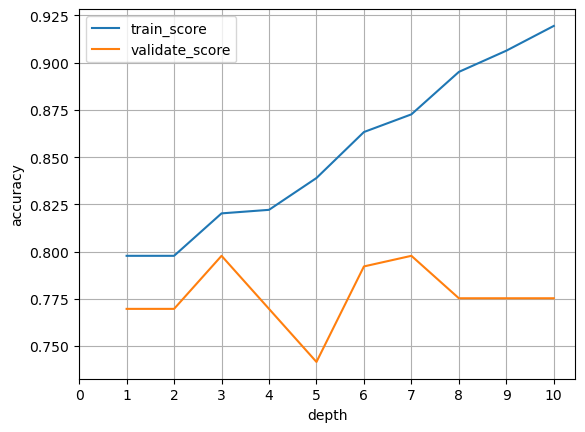

In [148]:
res_df[res_df.columns[:-3]].set_index("depth").plot()
plt.ylabel('accuracy')
plt.xticks(np.arange(0,11))
plt.grid()
plt.show()

1. Work through these same exercises using the Telco dataset.
2. Experiment with this model on other datasets with a higher number of output classes.